# Goal:
Perform data exploration on the NBA advanced box scores dataset to determine whether it has data worth adding into the NCAA player career projections. 

Import libraries needed to perform data exploration from our postgres database

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import getpass
import psycopg2
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

Get password from the user and then establish connection with the database called "cs20_group4"

In [17]:
mypasswd = getpass.getpass()
conn = psycopg2.connect(database = 'cs20_group4',
                              user = 'fhfrf', # replace with pawprint
                              host = 'pgsql.dsa.lan',
                              password = mypasswd)

········


Grab the entire nba_advanced_boxscores data table and read it into a pandas dataframe called nba_advanced_box and display the first five rows

In [18]:
nba_advanced_box = pd.read_sql_query("""
SELECT * from nba_advanced_boxscores""", con = conn)
nba_advanced_box.head()

,boxscore,away_assist_percentage,away_assists,away_block_percentage,away_blocks,away_defensive_rating,away_defensive_rebound_percentage,away_defensive_rebounds,away_effective_field_goal_percentage,away_field_goal_attempts,away_field_goal_percentage,away_field_goals,away_free_throw_attempt_rate,away_free_throw_attempts,away_free_throw_percentage,away_free_throws,away_losses,away_minutes_played,away_offensive_rating,away_offensive_rebound_percentage,away_offensive_rebounds,away_personal_fouls,away_points,away_steal_percentage,away_steals,away_three_point_attempt_rate,away_three_point_field_goal_attempts,away_three_point_field_goal_percentage,away_three_point_field_goals,away_total_rebound_percentage,away_total_rebounds,away_true_shooting_percentage,away_turnover_percentage,away_turnovers,away_two_point_field_goal_attempts,away_two_point_field_goal_percentage,away_two_point_field_goals,away_wins,game_date,home_assist_percentage,home_assists,home_block_percentage,home_blocks,home_defensive_rating,home_defensive_rebound_percentage,home_defensive_rebounds,home_effective_field_goal_percentage,home_field_goal_attempts,home_field_goal_percentage,home_field_goals,home_free_throw_attempt_rate,home_free_throw_attempts,home_free_throw_percentage,home_free_throws,home_losses,home_minutes_played,home_offensive_rating,home_offensive_rebound_percentage,home_offensive_rebounds,home_personal_fouls,home_points,home_steal_percentage,home_steals,home_three_point_attempt_rate,home_three_point_field_goal_attempts,home_three_point_field_goal_percentage,home_three_point_field_goals,home_total_rebound_percentage,home_total_rebounds,home_true_shooting_percentage,home_turnover_percentage,home_turnovers,home_two_point_field_goal_attempts,home_two_point_field_goal_percentage,home_two_point_field_goals,home_wins,location,losing_abbr,losing_name,pace,winner,winning_abbr,winning_name
0,201810160BOS,0.529,18.0,0.083,5.0,100.7,0.774,41.0,0.420,87.0,0.391,34.0,0.264,23.0,0.609,14.0,0.0,240.0,83.4,0.122,6.0,20.0,87.0,0.077,8.0,0.299,26.0,0.192,5.0,0.461,47.0,0.448,0.141,16.0,61.0,0.475,29.0,0.0,2018-10-16 20:00:00,0.500,21.0,0.082,5.0,83.4,0.878,43.0,0.490,97.0,0.433,42.0,0.144,14.0,0.714,10.0,0.0,240.0,100.7,0.226,12.0,20.0,105.0,0.067,7.0,0.381,37.0,0.297,11.0,0.539,55.0,0.509,0.119,14.0,60.0,0.517,31.0,1.0,"TD Garden, Boston, Massachusetts",PHI,Philadelphia 76ers,104.3,Home,BOS,Boston Celtics
1,201810160GSW,0.636,21.0,0.087,6.0,105.6,0.630,29.0,0.418,91.0,0.363,33.0,0.407,37.0,0.649,24.0,1.0,240.0,97.7,0.281,16.0,21.0,100.0,0.117,12.0,0.407,37.0,0.270,10.0,0.437,45.0,0.466,0.115,14.0,54.0,0.426,23.0,0.0,2018-10-16 22:30:00,0.667,28.0,0.130,7.0,97.7,0.719,41.0,0.479,95.0,0.442,42.0,0.189,18.0,0.944,17.0,0.0,240.0,105.6,0.370,17.0,29.0,108.0,0.068,7.0,0.274,26.0,0.269,7.0,0.563,58.0,0.525,0.169,21.0,69.0,0.507,35.0,1.0,"Oracle Arena, Oakland, California",OKC,Oklahoma City Thunder,102.3,Home,GSW,Golden State Warriors
2,201810170CHO,0.619,26.0,0.074,4.0,109.2,0.836,46.0,0.576,85.0,0.494,42.0,0.235,20.0,0.750,15.0,0.0,240.0,110.2,0.256,11.0,25.0,113.0,0.049,5.0,0.400,34.0,0.412,14.0,0.582,57.0,0.602,0.183,21.0,51.0,0.549,28.0,1.0,2018-10-17 19:00:00,0.512,21.0,0.176,9.0,110.2,0.744,32.0,0.533,92.0,0.446,41.0,0.239,22.0,0.636,14.0,1.0,240.0,109.2,0.164,9.0,19.0,112.0,0.078,8.0,0.413,38.0,0.421,16.0,0.418,41.0,0.551,0.098,11.0,54.0,0.463,25.0,0.0,"Spectrum Center, Charlotte, North Carolina",CHO,Charlotte Hornets,102.6,Away,MIL,Milwaukee Bucks
3,201810170DET,0.700,28.0,0.074,5.0,103.0,0.708,34.0,0.518,82.0,0.488,40.0,0.268,22.0,0.682,15.0,1.0,240.0,100.0,0.135,5.0,23.0,100.0,0.090,9.0,0.329,27.0,0.185,5.0,0.459,39.0,0.545,0.156,17.0,55.0,0.636,35.0,0.0,2018-10-17 19:00:00,0.538,21.0,0.091,5.0,100.0,0.865,32.0,0.457,92.0,0.424,39.0,0.239,22.0,0.864,19.0,0.0,240.0,103.0,0.292,14.0,20.0,103.0,0.050,5.0,0.261,24.0,0.250,6.0,0.541,46.0,0.506,0.121,14.0,68.0,0.485,33.0,1.0,"Little Caesars Arena, Detroit, Michigan",BRK,Brooklyn Nets,100.0,Home,DET,Detroit Pistons
4,201810170H

Display the descriptive statistics for all the numerical columns of the dataset

In [19]:
nba_advanced_box.describe()

,away_assist_percentage,away_assists,away_block_percentage,away_blocks,away_defensive_rating,away_defensive_rebound_percentage,away_defensive_rebounds,away_effective_field_goal_percentage,away_field_goal_attempts,away_field_goal_percentage,away_field_goals,away_free_throw_attempt_rate,away_free_throw_attempts,away_free_throw_percentage,away_free_throws,away_losses,away_minutes_played,away_offensive_rating,away_offensive_rebound_percentage,away_offensive_rebounds,away_personal_fouls,away_points,away_steal_percentage,away_steals,away_three_point_attempt_rate,away_three_point_field_goal_attempts,away_three_point_field_goal_percentage,away_three_point_field_goals,away_total_rebound_percentage,away_total_rebounds,away_true_shooting_percentage,away_turnover_percentage,away_turnovers,away_two_point_field_goal_attempts,away_two_point_field_goal_percentage,away_two_point_field_goals,away_wins,home_assist_percentage,home_assists,home_block_percentage,home_blocks,home_defensive_rating,home_defensive_rebound_percentage,home_defensive_rebounds,home_effective_field_goal_percentage,home_field_goal_attempts,home_field_goal_percentage,home_field_goals,home_free_throw_attempt_rate,home_free_throw_attempts,home_free_throw_percentage,home_free_throws,home_losses,home_minutes_played,home_offensive_rating,home_offensive_rebound_percentage,home_offensive_rebounds,home_personal_fouls,home_points,home_steal_percentage,home_steals,home_three_point_attempt_rate,home_three_point_field_goal_attempts,home_three_point_field_goal_percentage,home_three_point_field_goals,home_total_rebound_percentage,home_total_rebounds,home_true_shooting_percentage,home_turnover_percentage,home_turnovers,home_two_point_field_goal_attempts,home_two_point_field_goal_percentage,home_two_point_field_goals,home_wins,pace
count,44344.000000,44344.000000,44344.000000,44344.000000,44342.000000,44342.000000,44342.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44342.000000,44342.000000,44342.000000,44344.000000,44344.000000,44342.000000,44344.000000,44344.000000,44344.000000,43930.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44343.000000,44343.000000,44342.000000,44342.000000,44342.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44342.000000,44342.000000,44342.000000,44344.000000,44344.000000,44342.000000,44344.000000,44344.000000,44344.000000,43733.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44344.000000,44342.000000
mean,0.578449,21.843744,0.069834,4.692495,109.313146,0.708415,29.779893,0.487077,83.185369,0.454202,37.715880,0.305411,24.994182,0.753910,18.837926,18.513485,241.750519,105.592858,0.275647,11.929480,22.545463,99.686248,0.082895,7.844940,0.188454,15.572411,0.332760,5.416561,0.490104,41.709476,0.530260,0.135994,14.852878,67.612958,0.479479,32.299319,18.520341,0.608802,23.729930,0.079999,5.368874,105.592806,0.724364,30.988431,0.500619,83.418907,0.467117,38.908127,0.320545,26.296297,0.756409,19.884832,18.187782,241.750519,109.313073,0.291597,12.393487,21.701312,103.243821,0.084769,8.027287,0.186872,15.481238,0.341560,5.505051,0.509919,43.382104,0.544387,0.131399,14.386862,67.937669,0.493184,33.403076,18.449959,93.747181
std,0.106200,5.298722,0.037083,2.525833,11.174022,0.086329,5.460594,0.063156,8.531734,0.056879,5.676199,0.108392,7.974446,0.100456,6.463730,14.382087,7.481858,11.189917,0.082584,4.305476,4.902846,12.952521,0.030725,3.012748,0.108032,9.169284,0.158511,3.864059,0.053974,6.600111,0.059243,0.036882,4.312705,12.171113,0.064879,6.730437,14.454611,0.103592,5.656379,0.040315,2.796519,11.189821,0.082586,5.509725,0.064668,8.523184,0.058914,5.967811,0.114377,8.445167,0.097908,6.832279,14.515925,7.4818

Determine which columns are missing values and how many values are missing. 

In [20]:
(nba_advanced_box.isnull().sum()).sort_values(ascending = False)

location                                  18432
home_three_point_field_goal_percentage      611
away_three_point_field_goal_percentage      414
away_offensive_rating                         2
away_defensive_rebounds                       2
home_offensive_rebound_percentage             2
home_offensive_rating                         2
away_offensive_rebound_percentage             2
away_offensive_rebounds                       2
away_steal_percentage                         2
away_defensive_rebound_percentage             2
home_steal_percentage                         2
away_defensive_rating                         2
home_defensive_rebounds                       2
home_defensive_rebound_percentage             2
home_defensive_rating                         2
pace                                          2
home_offensive_rebounds                       2
home_blocks                                   1
home_block_percentage                         1
away_losses                             

See if there are any correlations in the dataset in case we need to reduce the dimensions. We can see that 

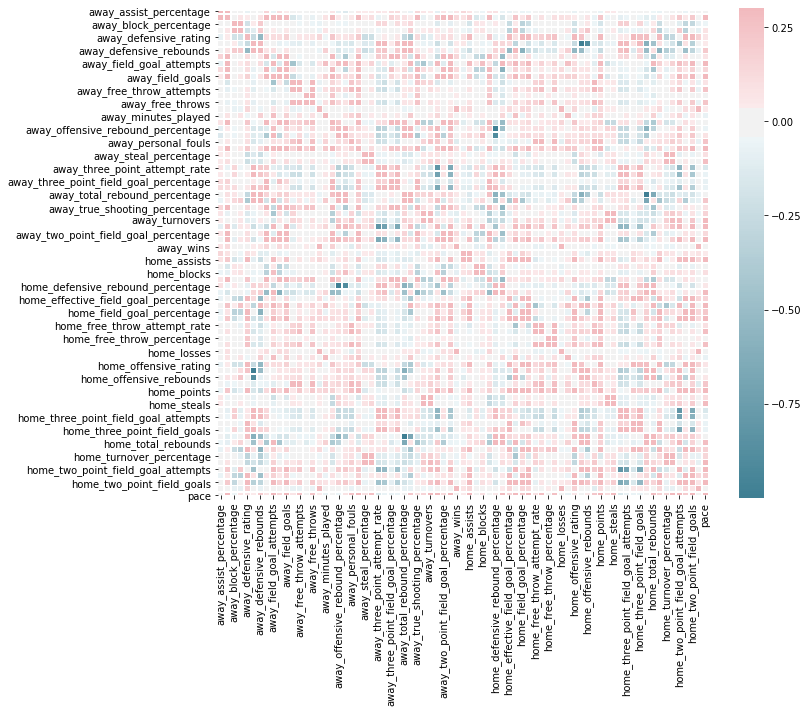

In [21]:
f, ax = plt.subplots(figsize = (11, 9))

sns.heatmap(nba_advanced_box.corr(),
           #mask = np.triu(np.ones_like(data.corr(), dtype=np.bool)),
           cmap = sns.diverging_palette(220, 10, as_cmap=True),
           vmax = 0.3,
           center = 0,
           square = True,
           linewidths = 0.5);

Let's create a barplot to display which teams win the most at home

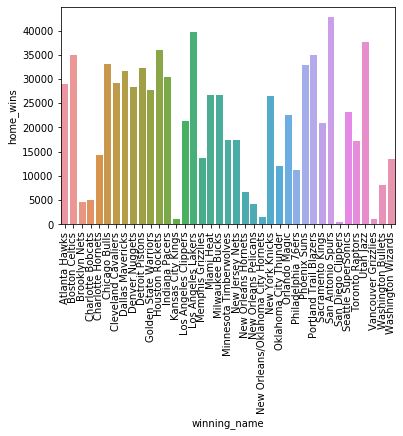

In [22]:
sns.barplot(x = 'winning_name',
           y = 'home_wins',
           data = nba_advanced_box.groupby('winning_name').sum().reset_index())
plt.xticks(rotation = 90);


Let's create a barplot to display which teams win the most on the road

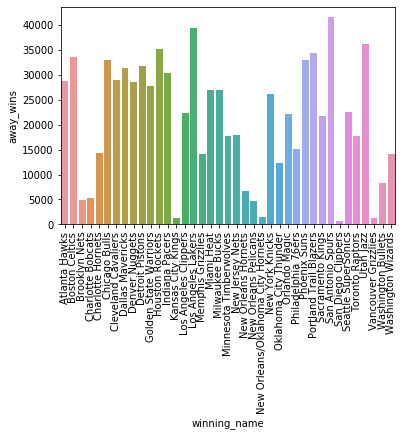

In [23]:
sns.barplot(x = 'winning_name',
           y = 'away_wins',
           data = nba_advanced_box.groupby('winning_name').sum().reset_index())
plt.xticks(rotation = 90);

Takeaway: For now, the advanced box scores dataset doesn't help us project NCAA players' NBA career outlook. We need player-coded data in order to get valuable insight. 